In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
bb_mass  = np.load('blackbox_mass.npy')
bb_sigloss = np.load('blackbox_sigloss.npy')
bb_bkgloss = np.load('blackbox_bkgloss.npy')
qcd_mass = np.load('QCDMC_mass.npy')
qcd_sigloss = np.load('QCDMC_sigloss.npy')
qcd_bkgloss = np.load('QCDMC_bkgloss.npy')

# Loss shape

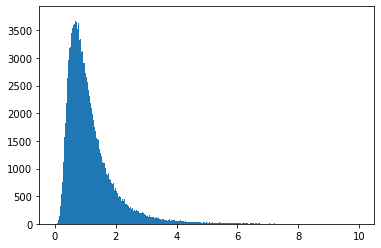

In [5]:
plt.hist(bb_bkgloss,bins=np.arange(0,10,0.01));

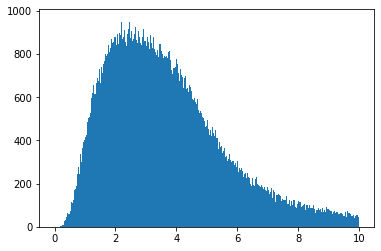

In [6]:
plt.hist(bb_sigloss,bins=np.arange(0,10,0.01));

# Determine the cuts and plot the mass

In [11]:
bins = np.arange(2800,8000,200)

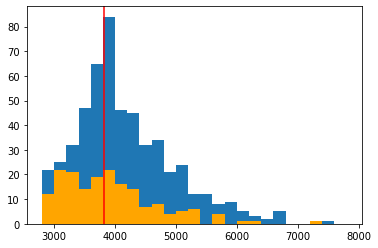

In [24]:
bbidx = np.where( (bb_bkgloss > 5.8) & (bb_sigloss<8))[0]
obs_hist = plt.hist(bb_mass[bbidx], bins = bins);

bkgidx = np.where( (qcd_bkgloss > 5.8) & (qcd_sigloss<8))[0]
bkg_hist = plt.hist(qcd_mass[bkgidx], bins = bins,color='orange');

plt.axvline(x=3823,color='r')



# Export to ROOT

In [25]:
import ROOT as r

xlow, xhigh = bins[0],bins[-1]
BINS = len(bins)-1


roothist_obs = r.TH1F('data_obs','data_obs',BINS,xlow,xhigh)
roothist_bkg = r.TH1F('bkgestimate','bkgestimate',BINS,xlow,xhigh)

for i in range(0,BINS):
    roothist_obs.SetBinContent(i+1,obs_hist[0][i])
    roothist_bkg.SetBinContent(i+1,bkg_hist[0][i])
    #print(bkg_hist[0][i])

    
f = r.TFile.Open("blackbox1.root",'recreate')
roothist_obs.Write()
roothist_bkg.Write()
f.Close()    

Welcome to JupyROOT 6.20/02
